# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [513]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [514]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [515]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(np.linalg.norm(np.dot(X, w) - y)) / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return np.dot(2 * X.T, (np.dot(X, w) - y)) / y.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [516]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [517]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = np.ndarray(shape=(n_iterations + 1, len(w_init)))
    weights[0] = w_init
    
    for i in range(n_iterations):
        current_weights = weights[i] - lr * loss.calc_grad(X, y, weights[i])
        weights[i + 1] = current_weights
    return weights

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [518]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [519]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649494


In [520]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(20, 10))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

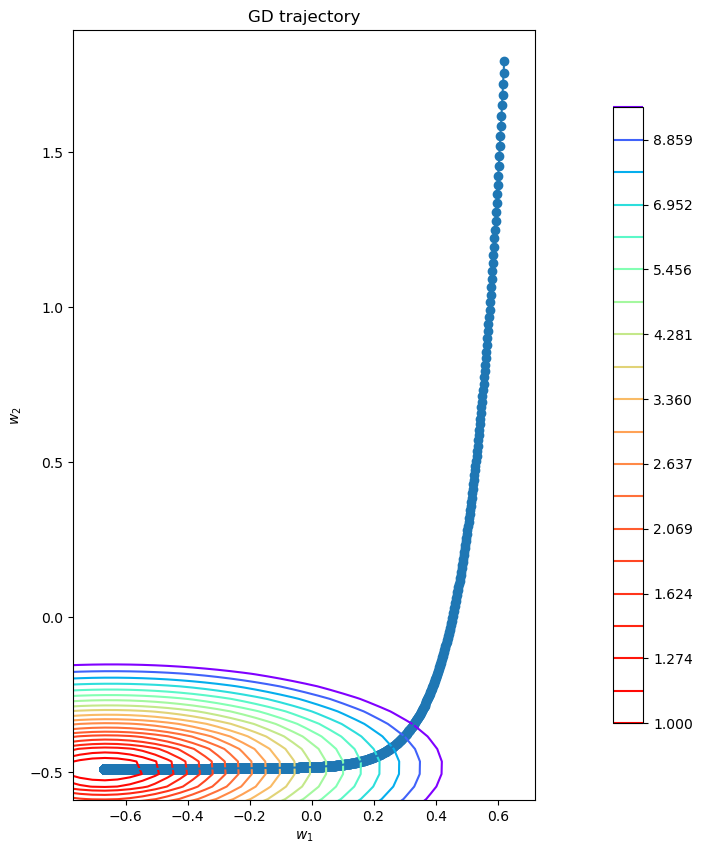

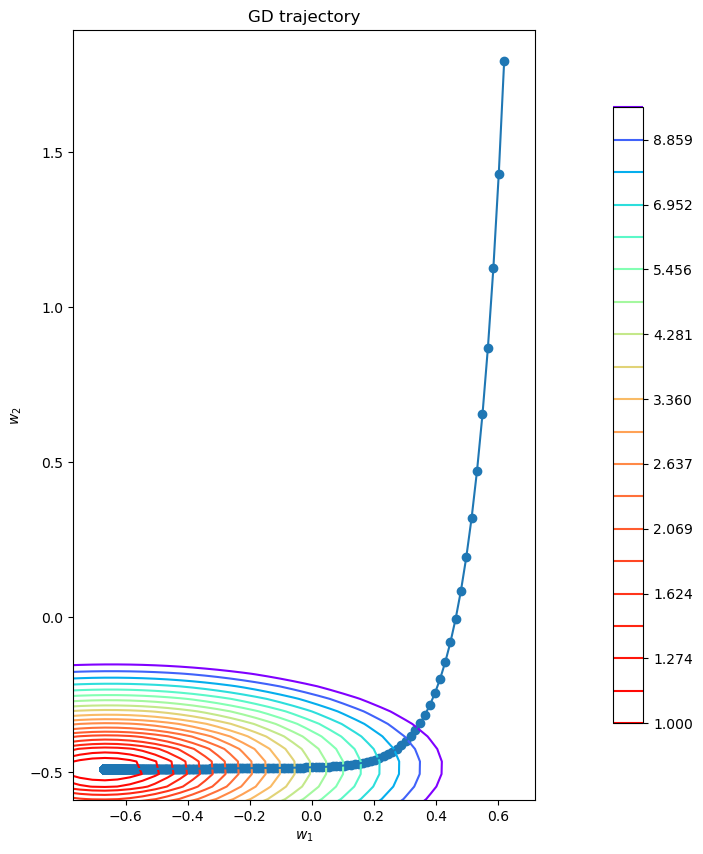

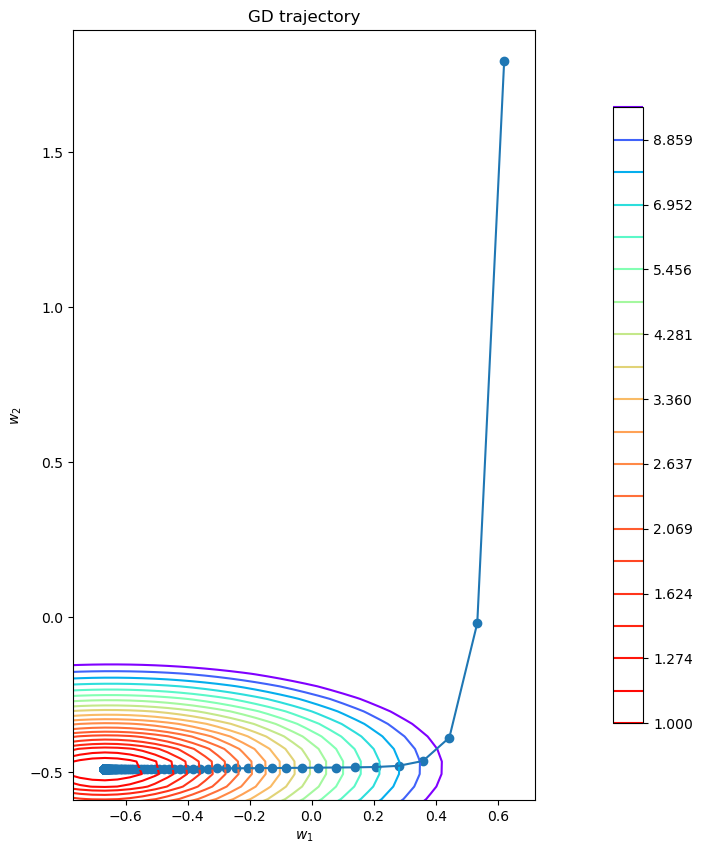

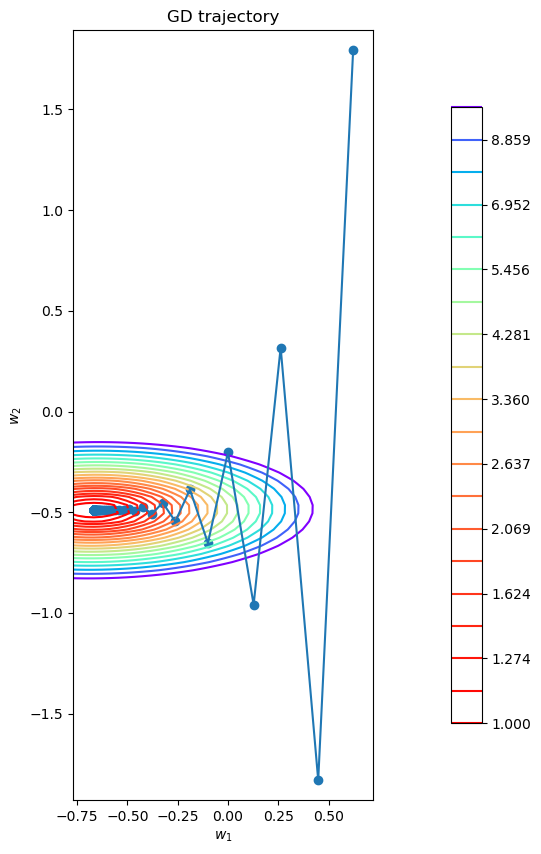

In [521]:
lr_s = [0.0001, 0.001, 0.005, 0.01]
for lr in lr_s:
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 10000), X, y, loss)

#### Выводы:
* При маленьком шаге (первые два графика) слишком долго движемся к минимум
* При большом шаге (последний график) мы сильно скачем и можем перескачить минимум
* Оптимальный шаг на третьем графике, попадаем в минимум за разумное количество шагов

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [522]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = np.ndarray(shape=(n_iterations + 1, len(w_init)))
    weights[0] = w_init
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_y = y[batch_indices]
        current_weights = weights[i] - lr * loss.calc_grad(batch, batch_y, weights[i])
        weights[i + 1] = current_weights
    return weights


**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Шаг: 0.0001, размер подвыборки: 2


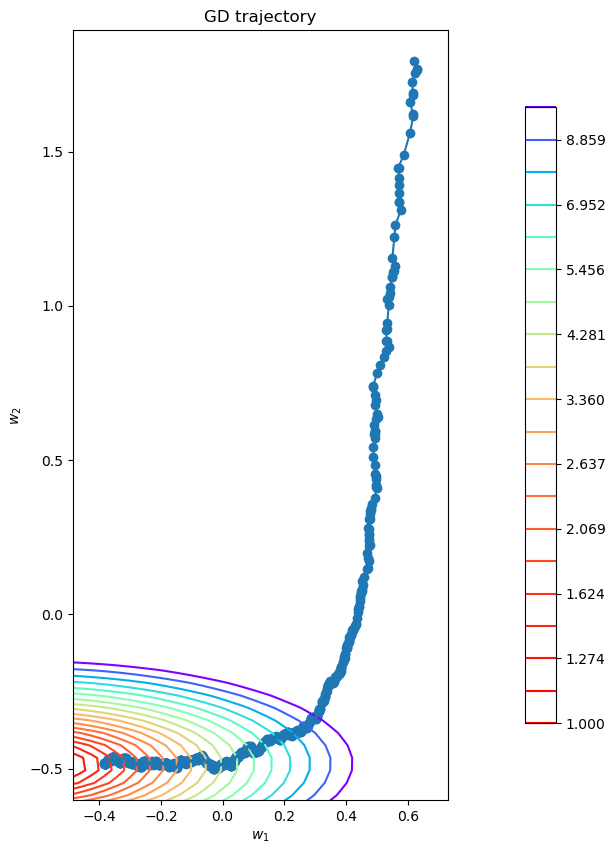

Шаг: 0.0001, размер подвыборки: 10


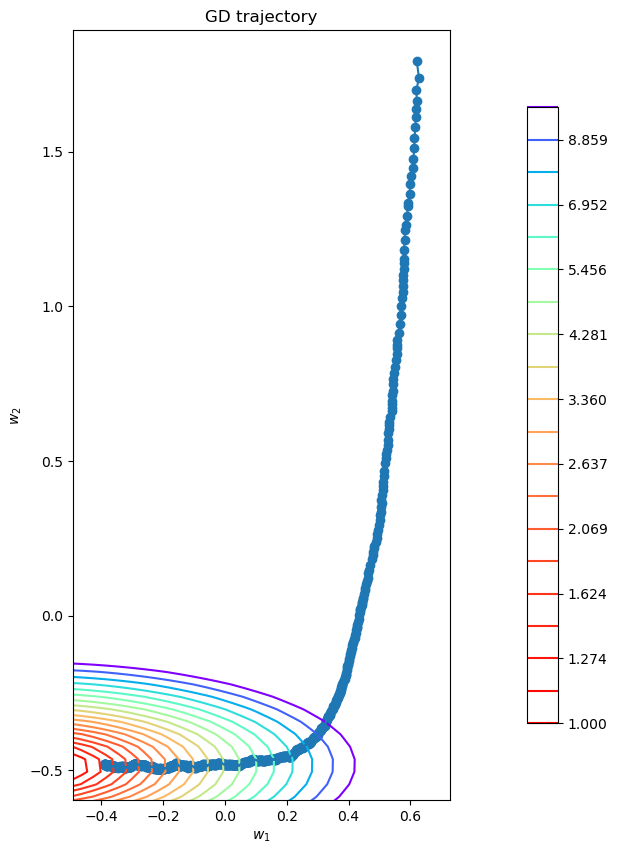

Шаг: 0.0001, размер подвыборки: 50


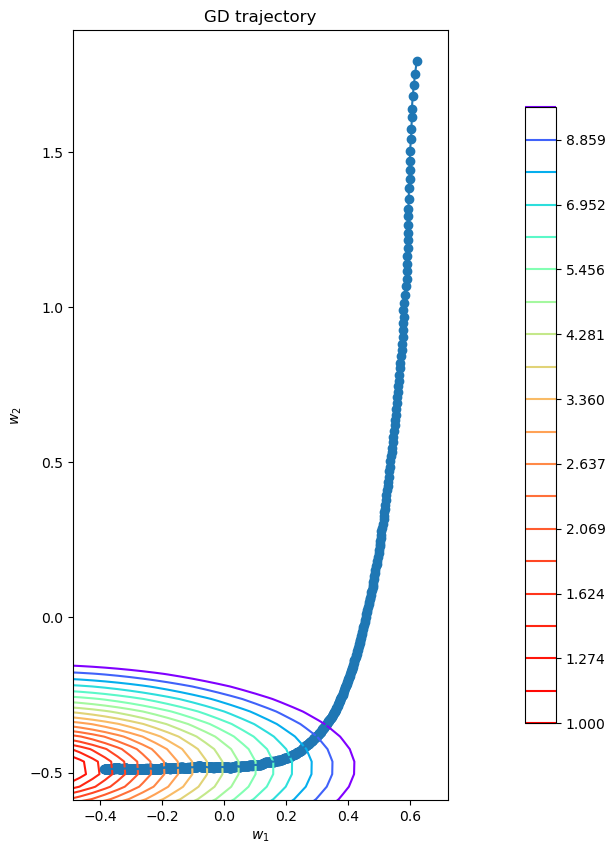

Шаг: 0.0001, размер подвыборки: 100


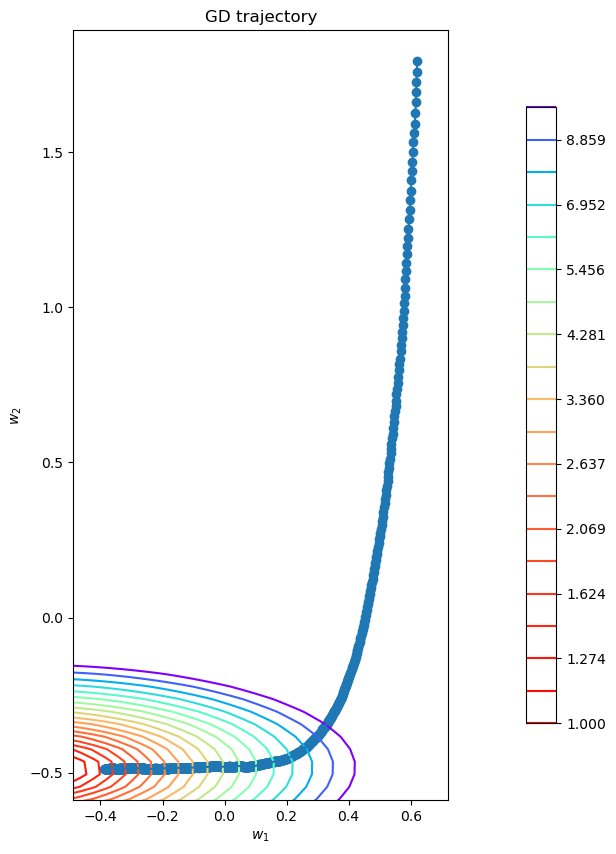

Шаг: 0.001, размер подвыборки: 2


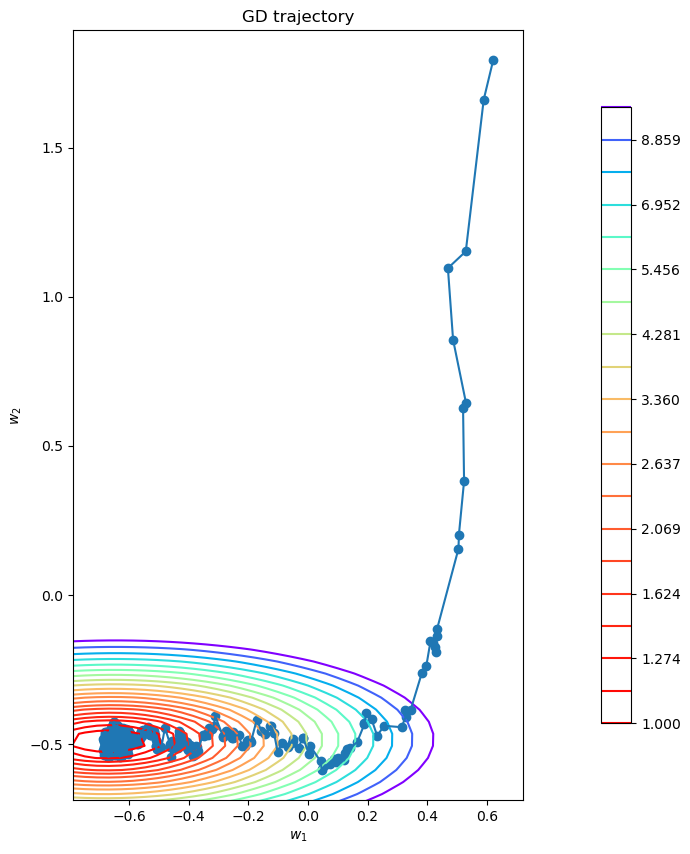

Шаг: 0.001, размер подвыборки: 10


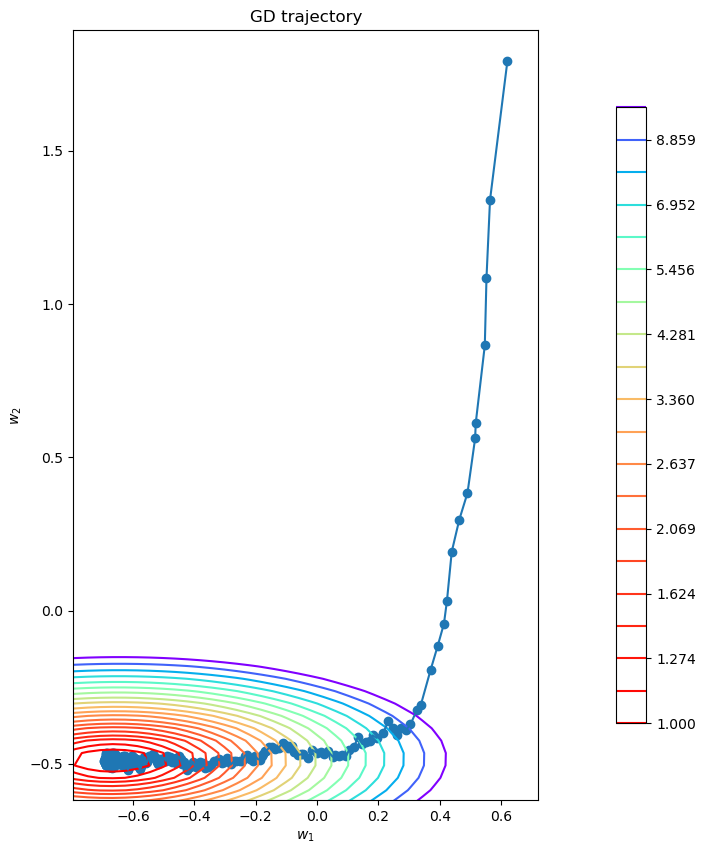

Шаг: 0.001, размер подвыборки: 50


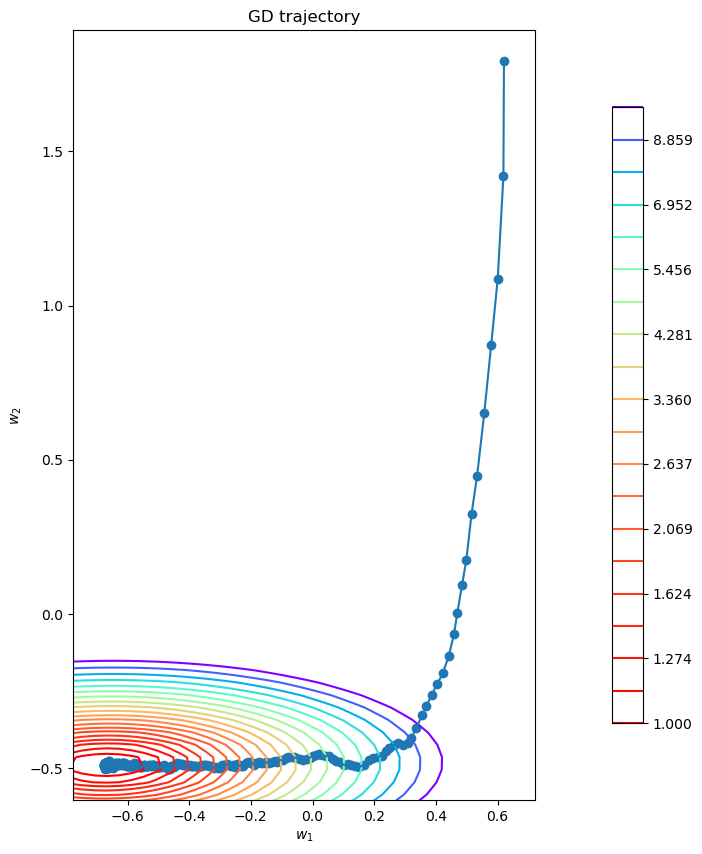

Шаг: 0.001, размер подвыборки: 100


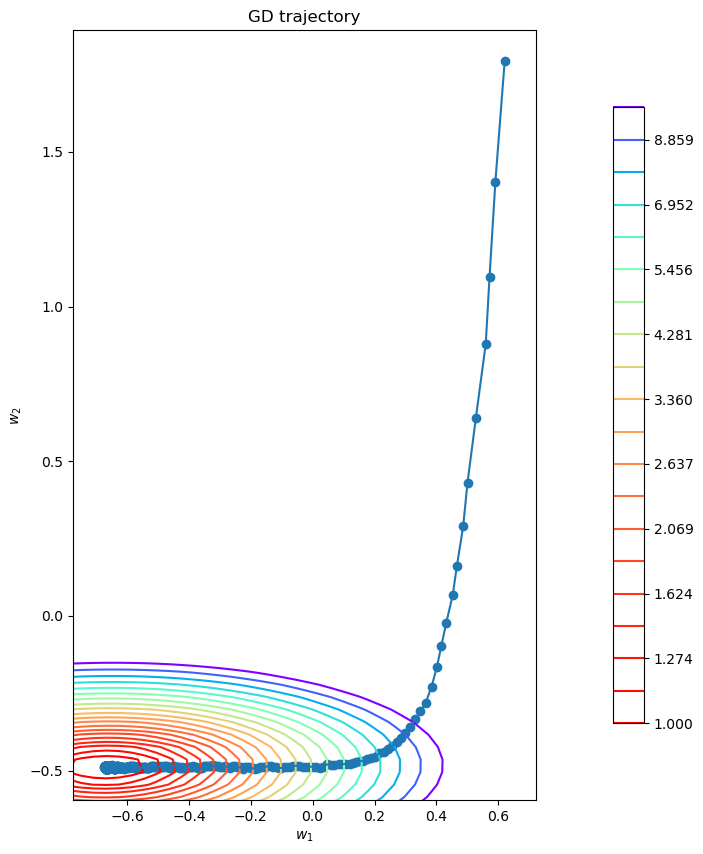

Шаг: 0.005, размер подвыборки: 2


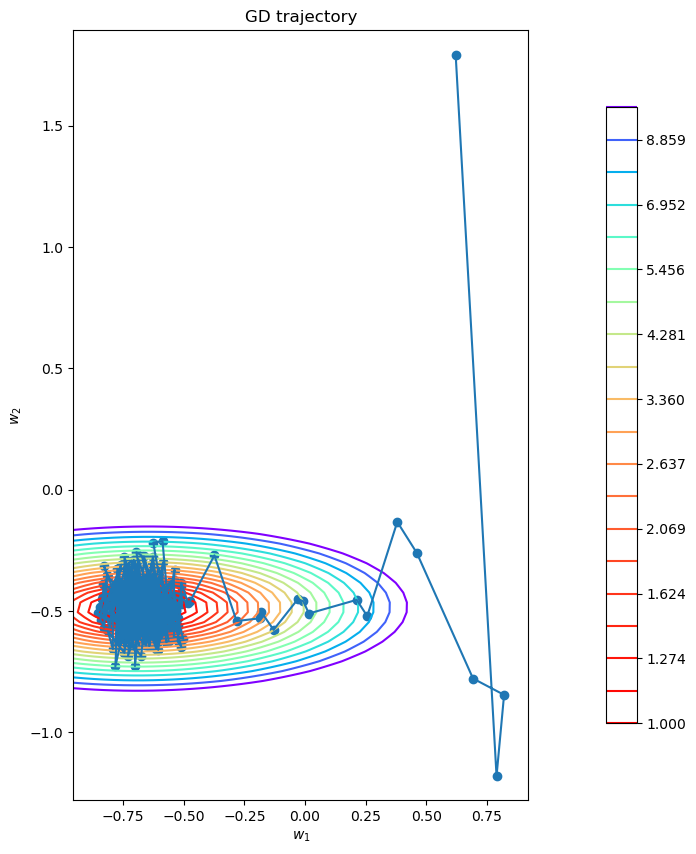

Шаг: 0.005, размер подвыборки: 10


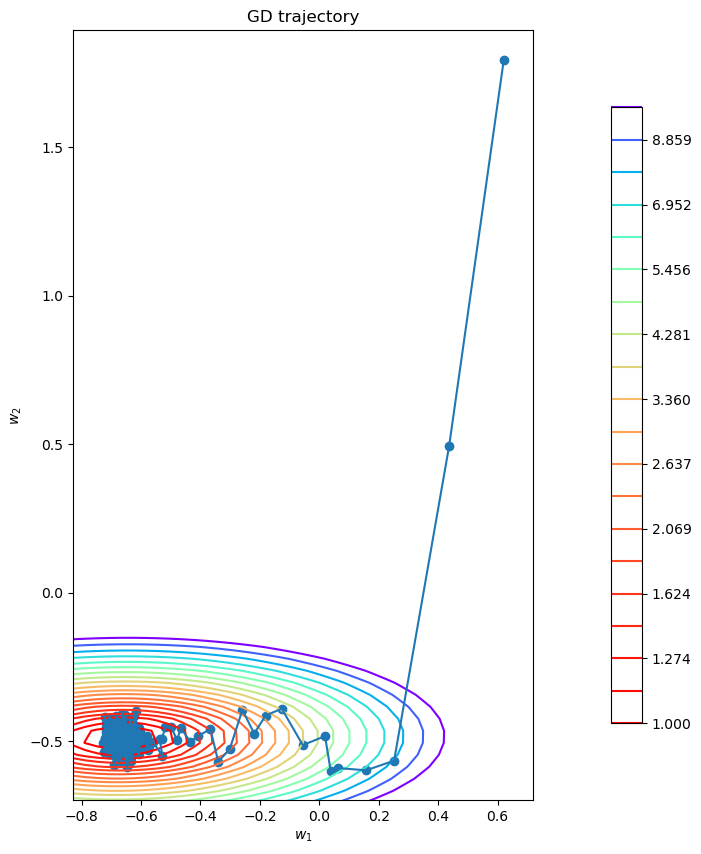

Шаг: 0.005, размер подвыборки: 50


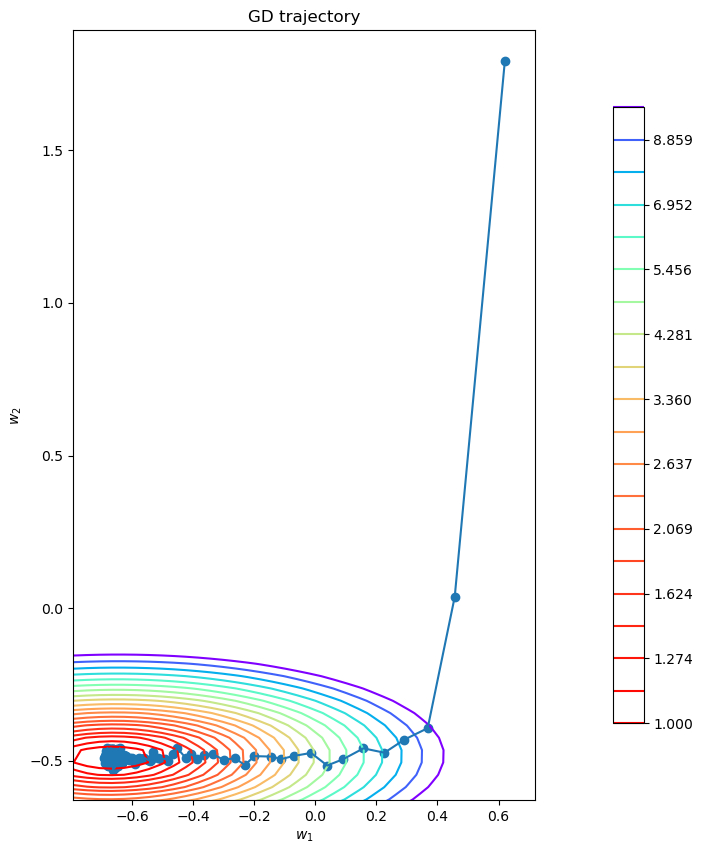

Шаг: 0.005, размер подвыборки: 100


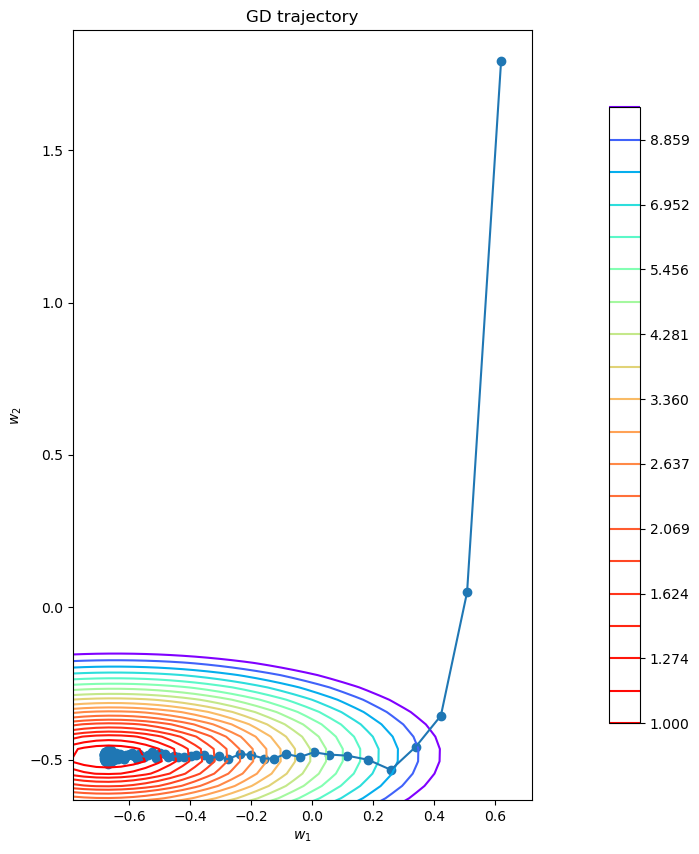

Шаг: 0.01, размер подвыборки: 2


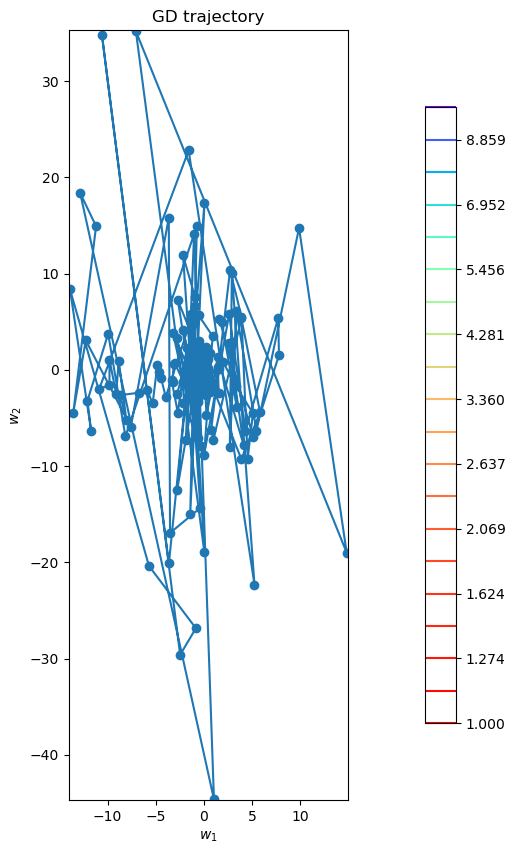

Шаг: 0.01, размер подвыборки: 10


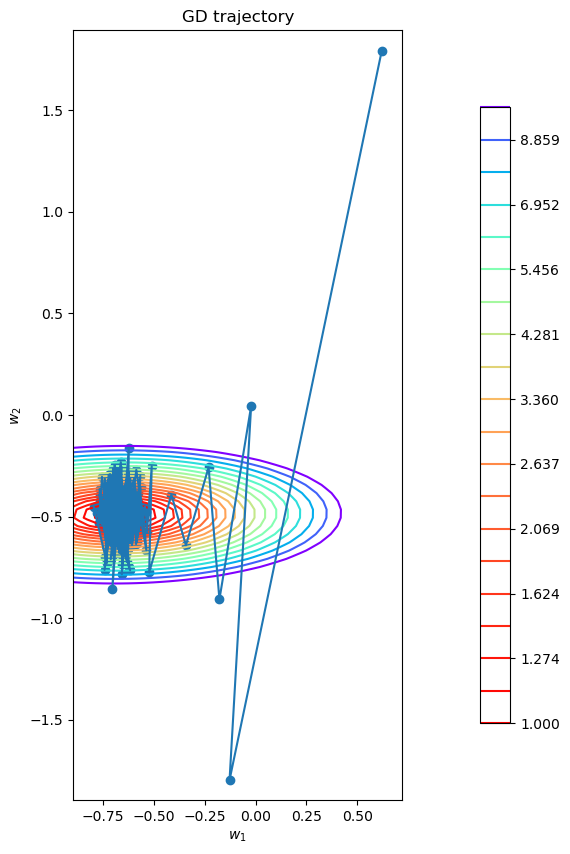

Шаг: 0.01, размер подвыборки: 50


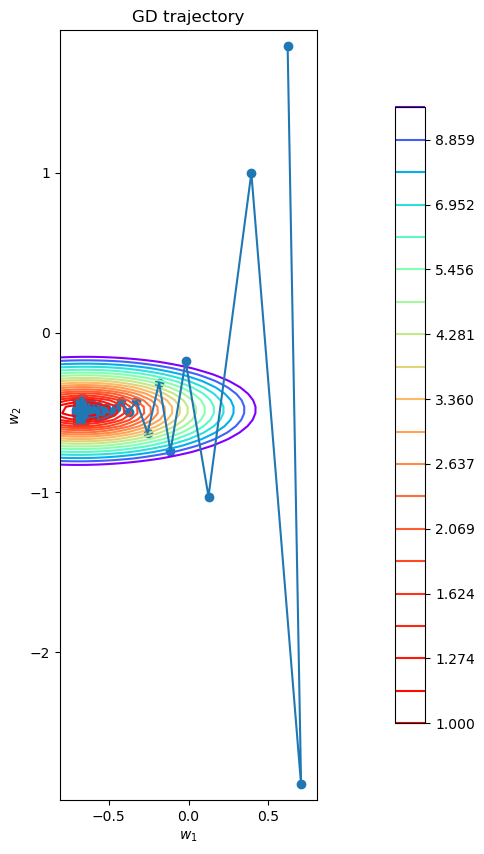

Шаг: 0.01, размер подвыборки: 100


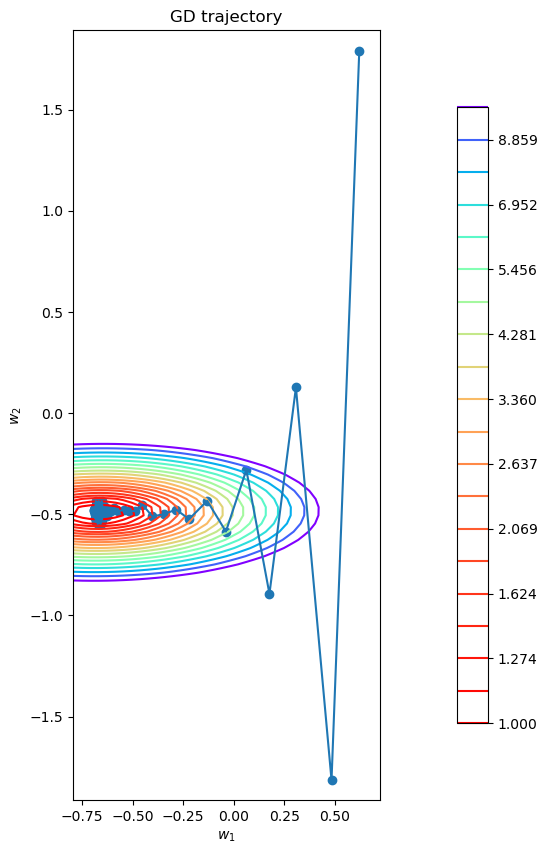

In [523]:
lr_s = [0.0001, 0.001, 0.005, 0.01]
batch_sizes = [2, 10, 50, 100]
for lr in lr_s:
    for batch_size in batch_sizes:
        print(f"Шаг: {lr}, размер подвыборки: {batch_size}")
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size), X, y, loss)


#### Выводы:
* При большом размере выборки и большом шаге спуску становится очень плохо
* При небольшом размере выборки и небольшом шаге мы просто не доходим до минимума и практически топчемся на месте
* При шаге 0.001 и размере выборки 100 (1 / 3 от общей выборки) спуск ведёт себя наиболее адекватно
* В целом, стохатический градиентный спуск ведёт себя как пьяница, и к нему надо аккуратно подбирать гиперпараметры

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [524]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weights = np.ndarray(shape=(n_iterations + 1, len(w_init)))
    weights[0] = w_init
    s_0 = 1
    for i in range (n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_y = y[batch_indices]
        current_lr = lr * ((s_0 / (s_0 + i)) ** p)
        current_weights = weights[i] - current_lr * loss.calc_grad(batch, batch_y, weights[i])
        weights[i + 1] = current_weights
    return weights

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

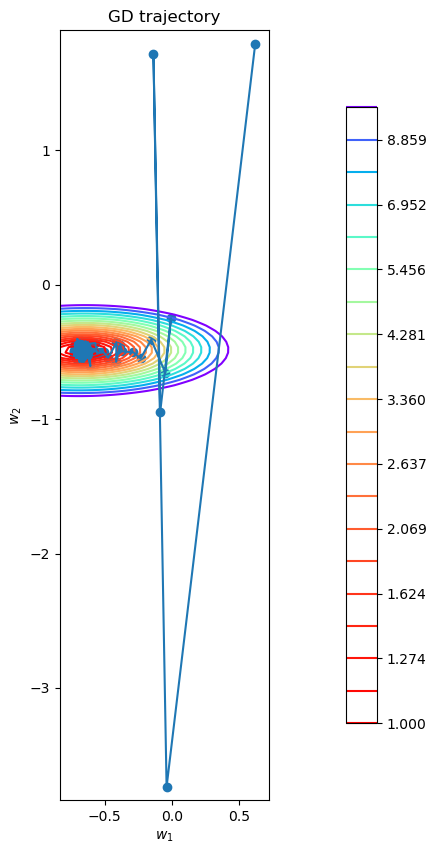

Параметр p = 0.1


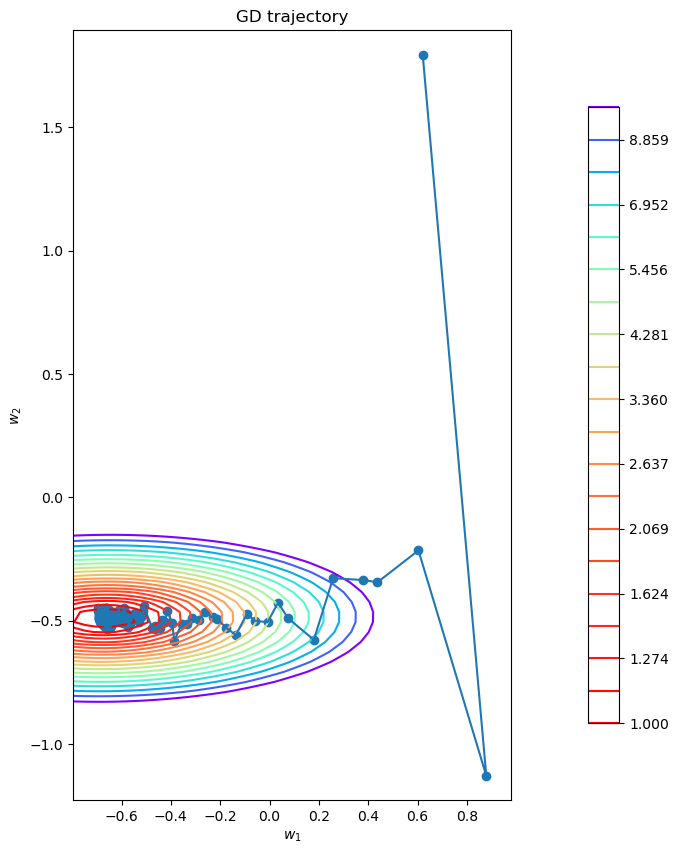

Параметр p = 0.3


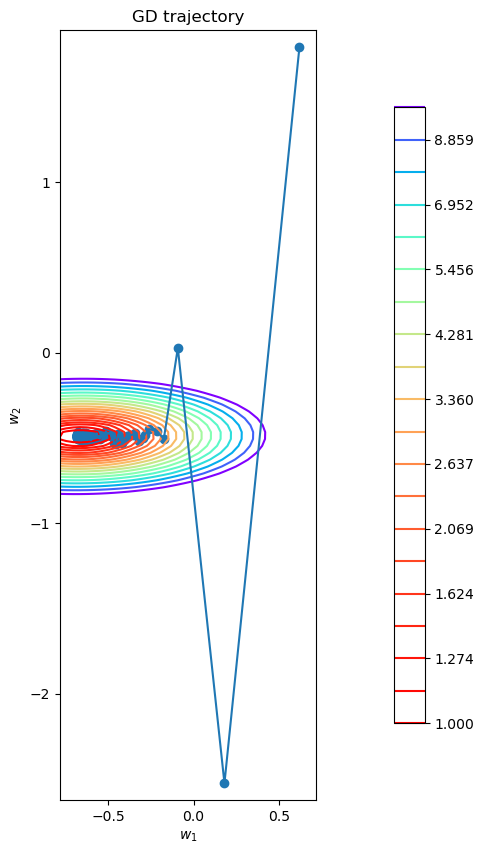

Параметр p = 0.5


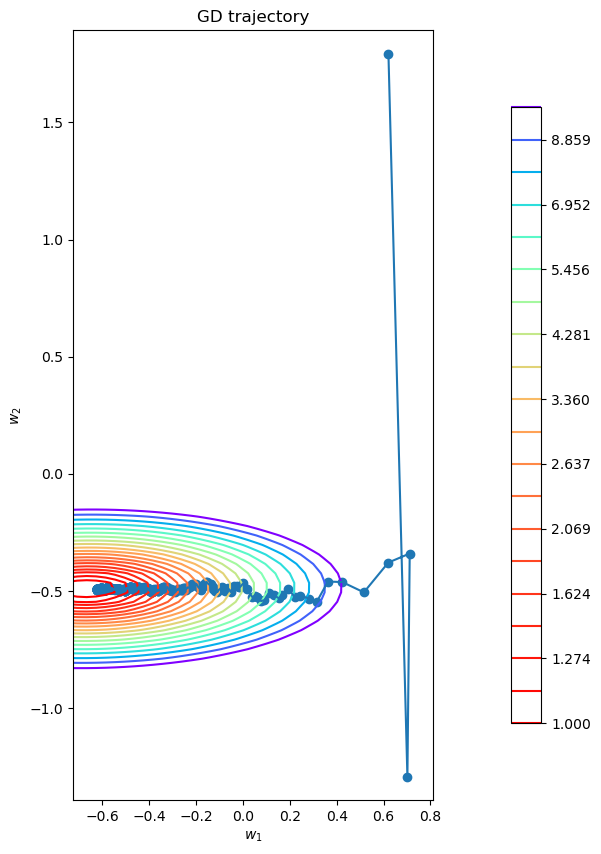

Параметр p = 0.7


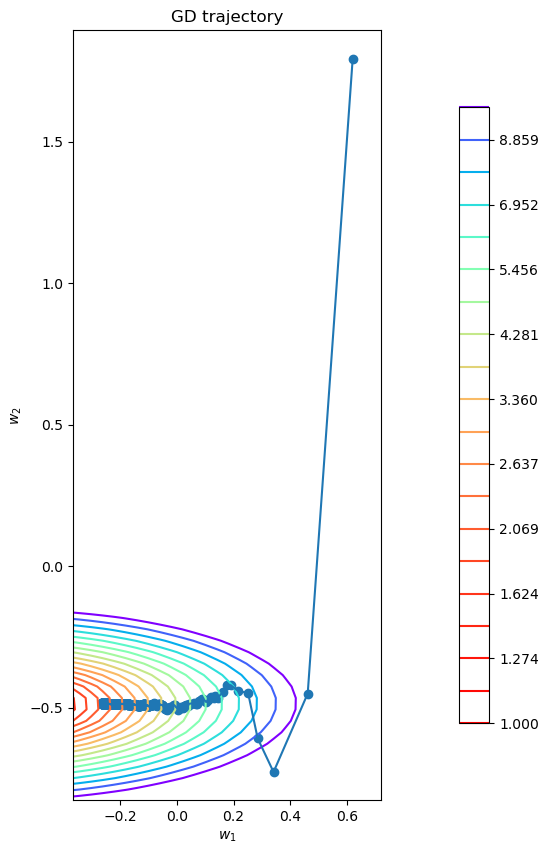

Параметр p = 1


In [525]:
p_s = [0.1, 0.3, 0.5, 0.7, 1]
for p in p_s:
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p), X, y, loss)
    print(f"Параметр p = {p}")

#### Выводы:
* При маленьком параметре p шаг слишком большой и мы перескакиваем минимум
* При большом параметере p алгоритм быстро останавливается и не доходит до минимума совсем
* При p = 0.5 алгоритм ведёт себя наиболее адекватно, его вполне можно использовать

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

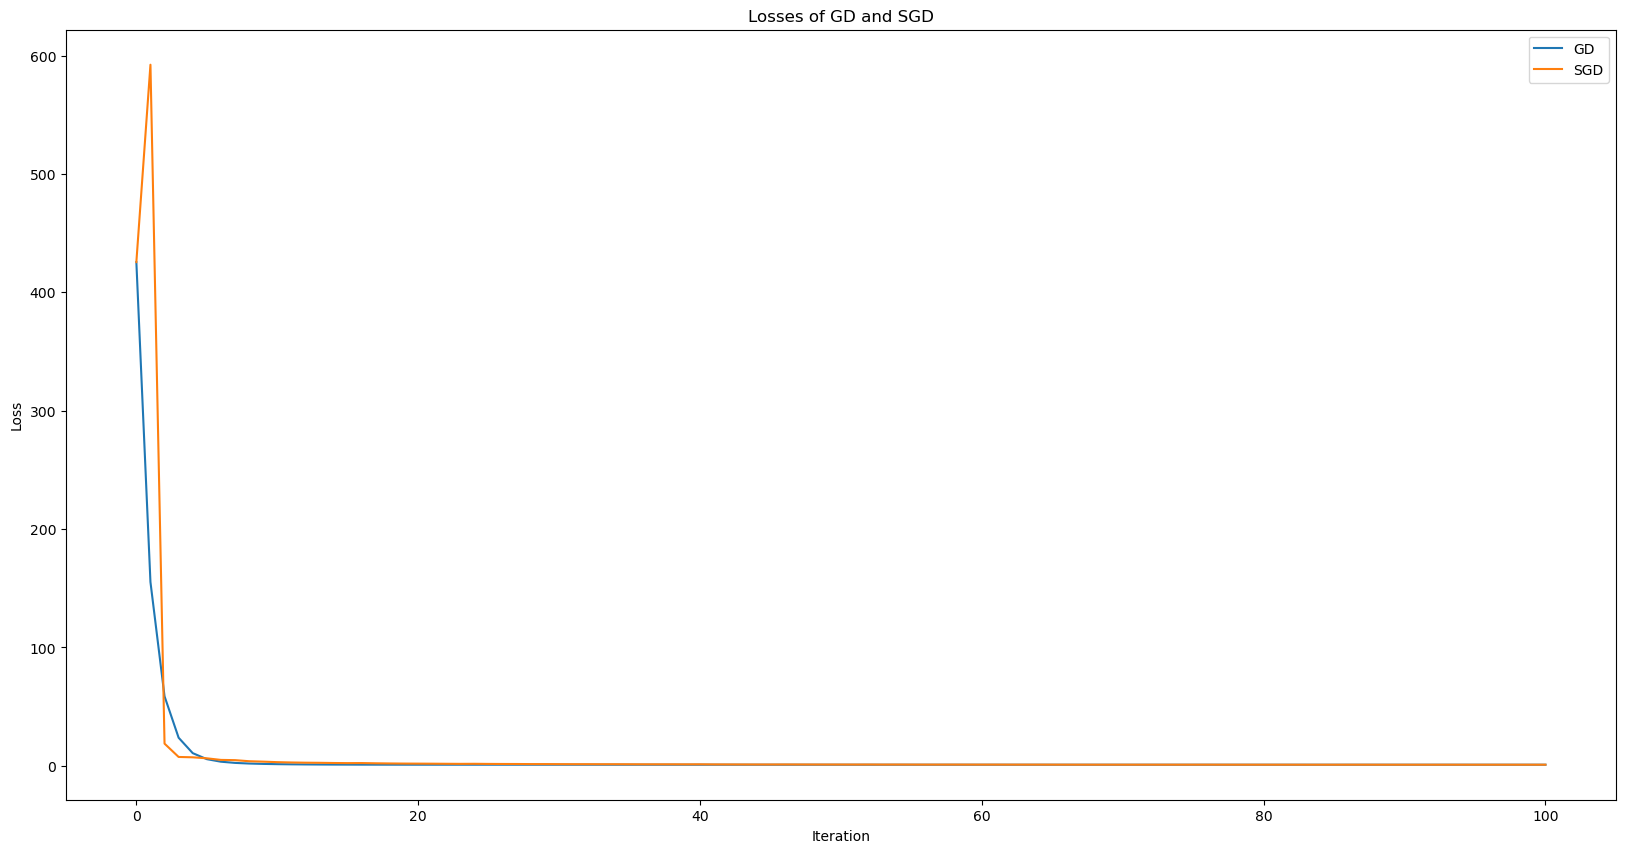

In [526]:
lr = 0.01
p = 0.5
n_iterations = 100
weights_gd = gradient_descent(w_init, X, y ,loss, lr, n_iterations)
weights_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, 10, p, n_iterations)

losses_gd = []
losses_sgd = []
for i in range(len(weights_gd)):
    losses_gd.append(loss.calc_loss(X, y, weights_gd[i]))
    losses_sgd.append(loss.calc_loss(X, y, weights_sgd[i]))

plt.figure(figsize=(20, 10))
plt.title('Losses of GD and SGD')
plt.plot(losses_gd, label = 'GD')
plt.plot(losses_sgd, label= 'SGD')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

#### Выводы:
* Явного преимущества стохатического градиентного спуска я не вижу, вероятно на серьёзных данных он будет  неустойчиво себя вести (как можно увидеть по выбросу лосса вверх), но в целом он довольно шустро пришёл к маленькому лоссу, но и обычный градиентный спуск справился довольно быстро и гораздо плавнее
* Как мне кажется, стохатический градиентный спуск всё же предпочтительнее, ведь он по времени работать на огромных данных может гораздо быстрее (кажда итерация обрабатывается быстрее за счёт маленькой подвыборки), но ему надо аккуратно подбирать гиперпараметры (размер подвыборки и p для корректировки размера шага)

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [527]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.zeros(shape=X.shape[1])
        weights = gradient_descent(w_init, X, y, self.loss, self.lr, 10000)
        self.w = weights[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [528]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [529]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [530]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [531]:
display(X_raw)

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [532]:
X_raw.drop(columns='index', inplace=True) # ненужный столбец
display(X_raw.isna().sum())

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

In [533]:
# Столбец с индексом 5 - количество дверей в машине.
display(X_raw[5].value_counts())

four    113
two      86
Name: 5, dtype: int64

In [534]:
# Больше машин с 4 дверьми, поэтому заполню пропуски значением 'four' 
X_raw[5] = X_raw[5].fillna('four')

In [535]:
from sklearn.impute import SimpleImputer

In [536]:
'''Столбцы с индексом 1, 18, 19, 21 и 22 не являются категориальными, это просто числовые характеристики машины.
Поэтому заполним их средними значениями этих стобцов'''
mask = (X_raw.dtypes != 'object').values
mis_replacer = SimpleImputer(strategy="mean")
X_real = X_raw[X_raw.columns[mask]]
X_no_mis_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_real),  columns=X_real.columns)
X_raw[X_raw.columns[mask]] = X_no_mis_real

print('Количество пропусков: ', X_raw.isna().sum().sum())

Количество пропусков:  0


In [537]:
# Применим one hot кодирование
X_raw = pd.get_dummies(X_raw, drop_first=True)
display(X_raw.head())

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [538]:
from sklearn.preprocessing import StandardScaler

In [539]:
# Нормализуем вещественные признаки
mask_real = (X_raw.dtypes == 'float64').values
X_raw[X_raw.columns[mask_real]] = StandardScaler().fit_transform(X_raw[X_raw.columns[mask_real]])
X_raw.columns = X_raw.columns.astype(str)
display(X_raw)

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433435,0.675938,...,0,0,0,0,0,0,0,1,0,0
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,0.768075,0.340812,1.680188,-0.339096,...,0,0,0,0,0,0,0,1,0,0
197,-1.470664,-0.845956,1.702619,1.187733,1.388653,0.709881,0.956057,0.340812,1.680188,-0.339096,...,0,0,0,0,0,0,0,1,0,0
198,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,0.884353,1.112950,0.932257,-1.227251,...,0,0,0,0,0,0,0,1,0,0
199,-1.470664,-0.845956,1.702619,1.187733,1.436357,0.709881,1.281633,0.437329,-1.199348,0.453899,...,0,0,0,0,0,1,0,0,0,0


In [540]:
from sklearn.model_selection import train_test_split

In [541]:
# Наконец разделяем на тестовую и обучающую выборки:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=37)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [542]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [543]:
from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression

In [544]:
print('Моя регрессия:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression.predict(X_test)))


# print('\n\n')
# lin_reg_sk = LinearRegression()
# lin_reg_sk.fit(X_train, y_train)
# print('Регрессия sklearn:')
# print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=lin_reg_sk.predict(X_train)))
# print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=lin_reg_sk.predict(X_test)))


Моя регрессия:
MSE on train:  1947330.2584487575
MSE on test:  5731057.003293954


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [545]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.square(np.linalg.norm(np.dot(X, w) - y)) / y.shape[0] + self.coef * np.square(np.linalg.norm(w[:-1]))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        result = np.dot(2 * X.T, (np.dot(X, w) - y)) / y.shape[0]
        w_copy = np.ndarray.copy(w)
        w_copy[-1] = 0
        result += 2 * self.coef * w_copy
        return result

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [546]:
#linear_regression_L2 = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [547]:
lm = 0.0001
test_lin_reg_L2 = LinearRegression(MSEL2Loss(lm))
test_lin_reg_L2.fit(X_train, y_train)
min_mse = mean_squared_error(y_true=y_test, y_pred=test_lin_reg_L2.predict(X_test))
final_lm = lm
for i in range(2, 100):
    test_lin_reg_L2 = LinearRegression(MSEL2Loss(lm * i))
    test_lin_reg_L2.fit(X_train, y_train)
    cur_mse = mean_squared_error(y_true=y_test, y_pred=test_lin_reg_L2.predict(X_test))
    if (cur_mse < min_mse):
        final_lm = lm * i
        min_mse = cur_mse
print(min_mse)
print(final_lm)

5355286.658829494
0.0012000000000000001


In [548]:
# Подходящий для нас коэф = 0.0012
from sklearn.linear_model import Ridge
linear_regression_L2 = LinearRegression(MSEL2Loss(0.0012))
linear_regression_L2.fit(X_train, y_train)
lin_reg_sk_L2 = Ridge(0.0012)
lin_reg_sk_L2.fit(X_train, y_train)

print('Моя обычная регрессия:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression.predict(X_test)))

print('\n\n')
print('Моя регрессия с L2 регуляризацией:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression_L2.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression_L2.predict(X_test)))

print('\n\n')
print('Гребневая регрессия sklearn:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=lin_reg_sk_L2.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=lin_reg_sk_L2.predict(X_test)))


Моя обычная регрессия:
MSE on train:  1947330.2584487575
MSE on test:  5731057.003293954



Моя регрессия с L2 регуляризацией:
MSE on train:  2086402.3511635172
MSE on test:  5355286.658829489



Гребневая регрессия sklearn:
MSE on train:  1906325.291279793
MSE on test:  6319006.852891726


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [549]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def __func_loss(self, z):
        if np.abs(z) < self.eps:
            return np.square(z) / 2
        else:
            return self.eps * (np.abs(z) - self.eps / 2)
        
    def __func_grad(self, z):
        if np.abs(z) < self.eps:
            return z
        else:
            return self.eps * np.sign(z)


    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        func_loss = np.vectorize(self.__func_loss)
        return np.sum(func_loss(np.dot(X, w) - y)) / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        func_grad = np.vectorize(self.__func_grad)
        return np.dot(X.T, func_grad(np.dot(X, w) - y)) / y.shape[0]
        

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [550]:
eps = 0
test_linear_regression_Huber = LinearRegression(HuberLoss(eps))
test_linear_regression_Huber.fit(X_train, y_train)
min_mse = mean_squared_error(y_true=y_test, y_pred=test_linear_regression_Huber.predict(X_test))
final_eps = eps
for i in range(2000, 2500, 10):
    eps = i
    test_linear_regression_Huber = LinearRegression(HuberLoss(eps))
    test_linear_regression_Huber.fit(X_train, y_train)
    cur_mse = mean_squared_error(y_true=y_test, y_pred=test_linear_regression_Huber.predict(X_test))
    if (cur_mse < min_mse):
        final_eps = eps
        min_mse = cur_mse
print(min_mse)
print(final_eps)

# Методом тыка выбрал диапазон от 2000 до 2500
# Наилучшее значение = 2490

4265650.706285577
2490


In [551]:
linear_regression_Huber = LinearRegression(HuberLoss(2490))
linear_regression_Huber.fit(X_train, y_train)

print('Моя обычная регрессия:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression.predict(X_test)))


print('\n\n')
print('Моя регрессия с L2 регуляризацией:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression_L2.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression_L2.predict(X_test)))

print('\n\n')
print('Моя регрессия с Huber Loss:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression_Huber.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression_Huber.predict(X_test)))


Моя обычная регрессия:
MSE on train:  1947330.2584487575
MSE on test:  5731057.003293954



Моя регрессия с L2 регуляризацией:
MSE on train:  2086402.3511635172
MSE on test:  5355286.658829489



Моя регрессия с Huber Loss:
MSE on train:  2286373.1632664087
MSE on test:  4265650.706285577


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [552]:
# https://memepedia.ru/wp-content/uploads/2022/01/uillem-defo-s-apelsinami-original.jpg

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [553]:
def simulate_annealing(
        w_init: np.ndarray,
        X: np.ndarray,
        y: np.ndarray,
        loss: BaseLoss,
        initial_temperature: float = 10,
        min_temperature: float = 0.0001,
        cooling_factor: float = 0.999):

    old_w = np.ndarray.copy(w_init)
    weights = [old_w]
    current_temperature = initial_temperature
    best_loss = loss.calc_loss(X, y, old_w)
    while current_temperature > min_temperature:
        new_w = old_w + np.random.standard_t(3, old_w.shape)
        current_temperature *= cooling_factor
        current_loss = loss.calc_loss(X, y, new_w)
        if current_loss <= best_loss:
            old_w = new_w
            best_loss = current_loss
        else:
            if np.random.rand() < np.exp((best_loss - current_loss) / current_temperature):
                old_w = new_w
                best_loss = current_loss
        weights.append(old_w)

    return weights


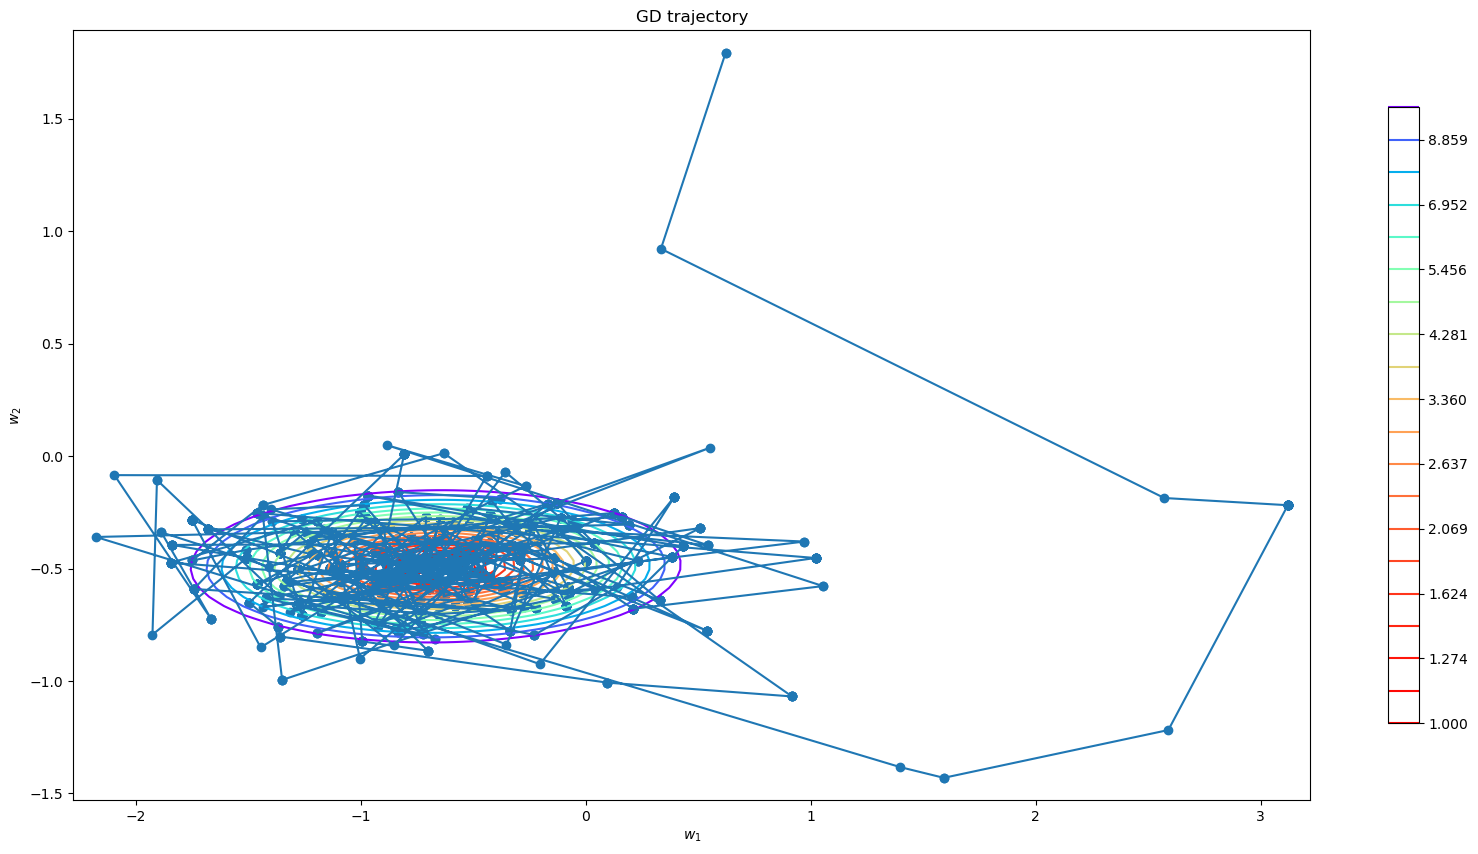

In [554]:

np.random.seed(1337)

n_features = 2
n_objects = 300

w_true = np.random.normal(size=(n_features,))

X_for_ann = np.random.uniform(-5, 5, (n_objects, n_features))
X_for_ann *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y_for_ann = X_for_ann.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

loss = MSELoss()
plot_gd(simulate_annealing(w_init, X_for_ann, y_for_ann, loss), X_for_ann, y_for_ann, loss)               

In [555]:
class LinearRegressionAnnealing:
    def __init__(
            self,
            loss: BaseLoss,
            initial_temperature: float = 10000,
            min_temperature: float = 0.0000000001,
            cooling_factor = 0.9995) -> None:
        self.loss = loss
        self.initial_temperature = initial_temperature
        self.min_temperature = min_temperature
        self.cooling_factor = cooling_factor

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegressionAnnealing":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.zeros(shape=X.shape[1])
        weights = simulate_annealing(
            w_init, X, y, self.loss, self.initial_temperature, self.min_temperature, self.cooling_factor)
        self.w = weights[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)


In [556]:
lin_reg_annealing = LinearRegressionAnnealing(MSELoss())
lin_reg_annealing.fit(X_train, y_train)

print('Моя обычная регрессия:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression.predict(X_test)))


print('\n\n')
print('Моя регрессия с L2 регуляризацией:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression_L2.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression_L2.predict(X_test)))

print('\n\n')
print('Моя регрессия с Huber Loss:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=linear_regression_Huber.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=linear_regression_Huber.predict(X_test)))

print('\n\n')
print('Моя регрессия с имитацией отжига:')
print('MSE on train: ', mean_squared_error(y_true=y_train, y_pred=lin_reg_annealing.predict(X_train)))
print('MSE on test: ', mean_squared_error(y_true=y_test, y_pred=lin_reg_annealing.predict(X_test)))


Моя обычная регрессия:
MSE on train:  1947330.2584487575
MSE on test:  5731057.003293954



Моя регрессия с L2 регуляризацией:
MSE on train:  2086402.3511635172
MSE on test:  5355286.658829489



Моя регрессия с Huber Loss:
MSE on train:  2286373.1632664087
MSE on test:  4265650.706285577



Моя регрессия с имитацией отжига:
MSE on train:  2158551.854511708
MSE on test:  5575105.84943545


#### Выводы:
* Судя по графику алгоритм супер-рандомный, гиперпараметры для регресии пришлось подобрать очень грустные, чтобы приемлемые ошибки получить.
* Скорее такая функция для регресии перебор, вероятно она нужна для более серьёзных задач. Градиентный спуск вполне себе нормально здесь работает, а отжиг нужен там, где наша функция будет иметь несколько минимумов (и где нам придётся найти глобальный минимум)